# Exercise 2.9

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.
sns.set_theme() # activate seaborn default theme

In [27]:
df = pd.read_csv('./datasets/Auto.csv')
# college.index.name = 'Names'
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [18]:
# A
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [19]:
# A
df.describe(include='number')

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.00,397.00,397.00,397.00,397.00,397.00,397.00
mean,23.52,5.46,193.53,"2,970.26",15.56,75.99,1.57
std,7.83,1.70,104.38,847.90,2.75,3.69,0.80
min,9.00,3.00,68.00,"1,613.00",8.00,70.00,1.00
25%,17.50,4.00,104.00,"2,223.00",13.80,73.00,1.00
50%,23.00,4.00,146.00,"2,800.00",15.50,76.00,1.00
75%,29.00,8.00,262.00,"3,609.00",17.10,79.00,2.00
max,46.60,8.00,455.00,"5,140.00",24.80,82.00,3.00


In [20]:
df.describe(include='object')

,horsepower,name
count,397,397
unique,94,304
top,150,ford pinto
freq,22,6


In [28]:
# investigate values on a specific column
df.horsepower.unique()

# notice there is a '?' question mark in the data


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [29]:
# fix dtype

df = df[df.horsepower != '?'].copy() # [1]
df['horsepower']=pd.to_numeric(df['horsepower'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [31]:
quantitative = df.select_dtypes(include=['number']).columns
quantitative


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [32]:
qualitative = df.select_dtypes(exclude=['number']).columns
qualitative


Index(['name'], dtype='object')

In [38]:
d = df.describe()
d.loc['range'] = d.loc['max'] - d.loc['min']
d.loc['range']

mpg               37.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,527.00
acceleration      16.80
year              12.00
origin             2.00
Name: range, dtype: float64

In [39]:
d.loc[['mean', 'std', 'range',]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
range,37.60,5.00,387.00,184.00,"3,527.00",16.80,12.00,2.00


In [48]:
df.iloc[10:86]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
10,15.00,8,383.00,170,3563,10.00,70,1,dodge challenger se
11,14.00,8,340.00,160,3609,8.00,70,1,plymouth 'cuda 340
12,15.00,8,400.00,150,3761,9.50,70,1,chevrolet monte carlo
13,14.00,8,455.00,225,3086,10.00,70,1,buick estate wagon (sw)
14,24.00,4,113.00,95,2372,15.00,70,3,toyota corona mark ii
...,...,...,...,...,...,...,...,...,...
82,23.00,4,120.00,97,2506,14.50,72,3,toyouta corona mark ii (sw)
83,28.00,4,98.00,80,2164,15.00,72,1,dodge colt (sw)
84,27.00,4,97.00,88,2100,16.50,72,3,toyota corolla 1600 (sw)
85,13.00,8,350.00,175,4100,13.00,73,1,buick century 350


In [58]:
df_b = df.drop(df.index[10:85])
b = df_b.describe()
b.loc['range'] = b.loc['max'] - b.loc['min']
b.loc[['mean','std', 'range']]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.37,5.38,187.88,101.00,"2,938.85",15.70,77.12,1.60
std,7.87,1.66,100.17,36.00,811.64,2.72,3.13,0.82
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


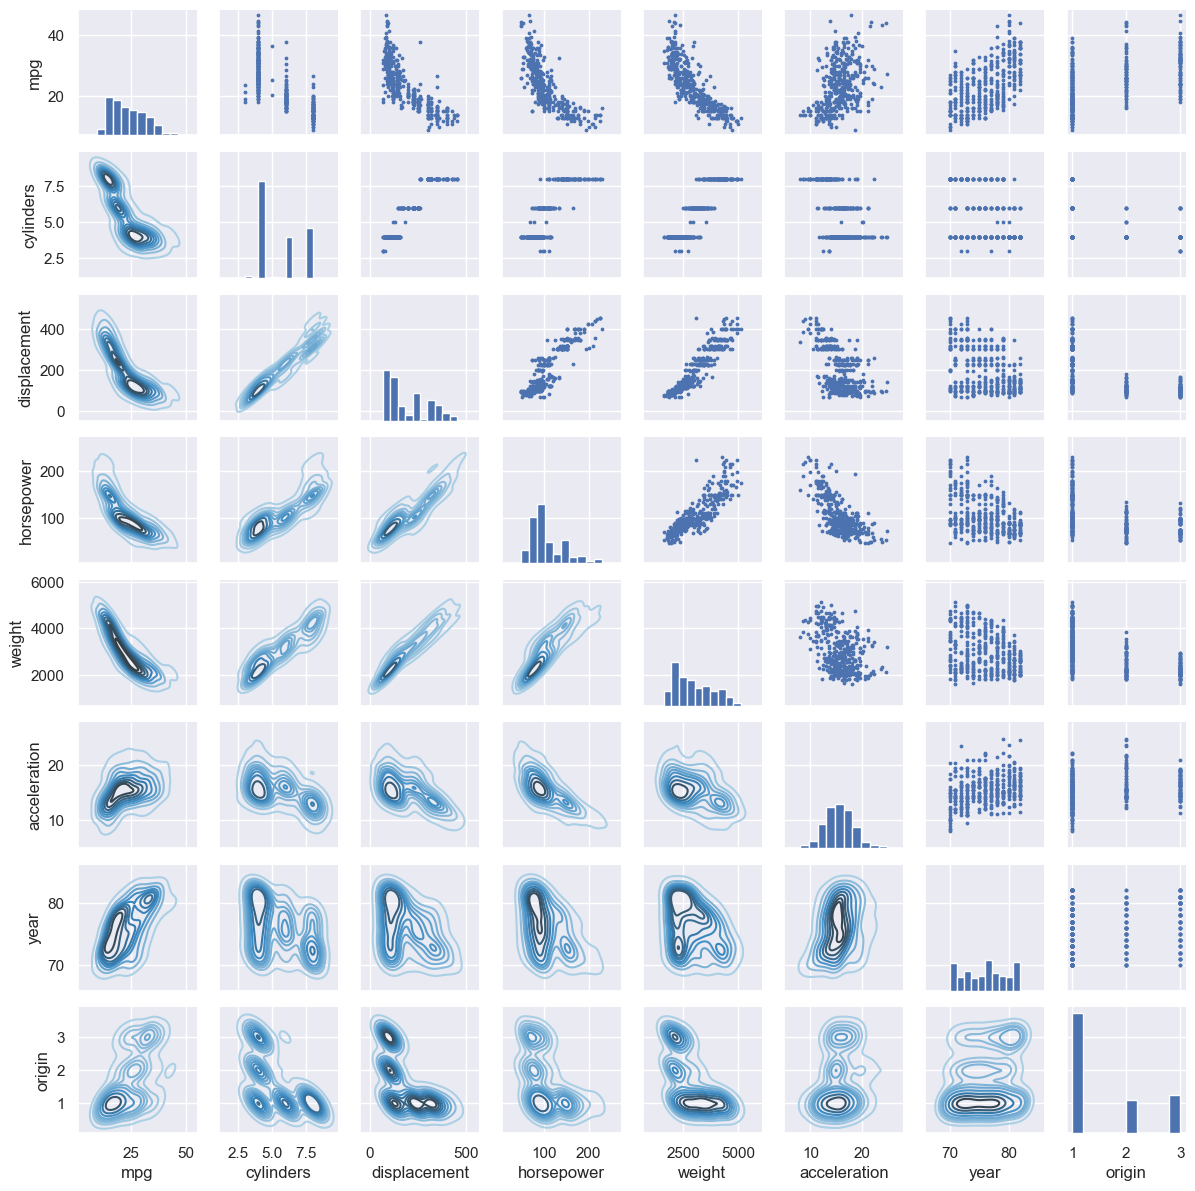

In [63]:
g = sns.PairGrid(df, height=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.figure.set_size_inches(12, 12)
